# Plotting

#### Configuration

By default, it uses `png` format. We prefer a vectorial format like `svg` for better results. Default font has been changed to _SF Mono_.

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import matplotlib
matplotlib.rcParams['font.family'] = "SF Mono"

#### Data preparation

In [2]:
import pandas as pd
import pandas_datareader.data as web
from datetime import datetime, timedelta

data = pd.read_csv("goog.csv", index_col=0)
series = pd.read_csv("goog.csv", header=0, index_col=0, squeeze=True, usecols=[0, 4], parse_dates=True)

msft = web.DataReader("MSFT", "google", datetime(2010, 1, 1), datetime(2016, 12, 31))
aapl = web.DataReader("AAPL", "google", datetime(2010, 1, 1), datetime(2016, 12, 31))

## Line

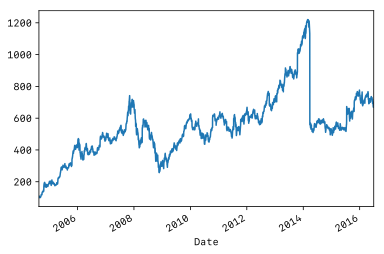

In [3]:
series.plot()

## Histograms

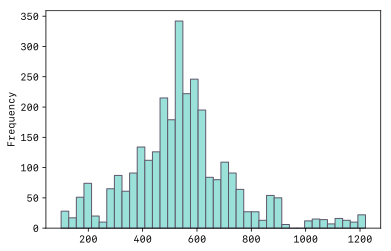

In [4]:
import matplotlib.pyplot as plt
data.Close.plot.hist(bins=40, color='#99E1D9', edgecolor='#5D576B')
plt.show()

Most of the formatting can be controlled setting some [parameters](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html#pandas.DataFrame.plot) in the plot function. Histogram, for instance, uses same parameters.

## Stacked

Possible `colormap` values can be checked [here](http://scipy.github.io/old-wiki/pages/Cookbook/Matplotlib/Show_colormaps).

array([<matplotlib.axes._subplots.AxesSubplot object at 0x10e2a2e48>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x10e3689b0>], dtype=object)

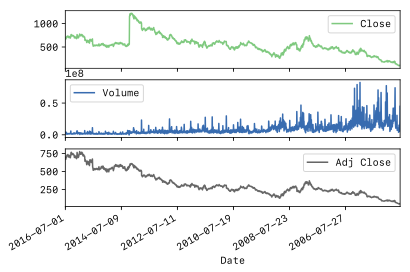

In [5]:
data[["Close","Volume","Adj Close"]].plot(subplots=True, colormap='Accent')

## Side-by-side

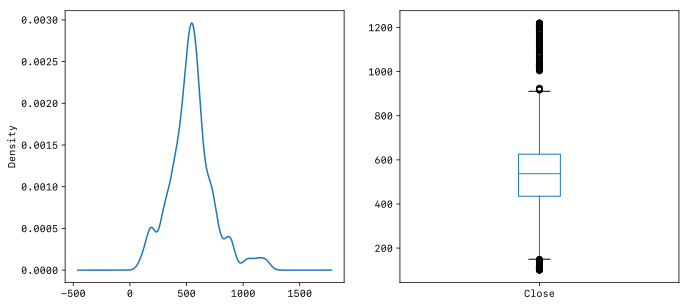

In [6]:
fig, axs = plt.subplots(1, 2, figsize=(11,5))
data.Close.plot.density(ax=axs[0])
data.Close.plot.box(ax=axs[1])

## Mixed

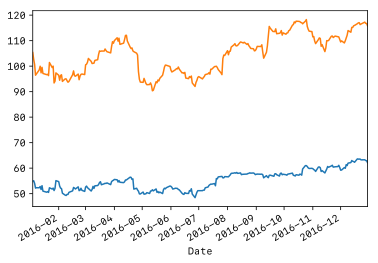

In [7]:
msft.Close["2016"].plot()
aapl.Close["2016"].plot()
plt.show()

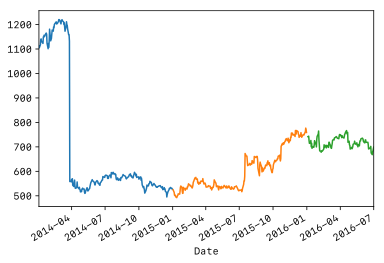

In [8]:
series["2014"].plot()
series["2015"].plot()
series["2016"].plot()
plt.show()

## Seaborn

[Seaborn](https://seaborn.pydata.org/) package has some interesting plots available. It's also based on matplotlib.

It should be included by default in Anaconda, otherwise do `pip install seaborn` from the command line.

In [9]:
import seaborn as sns

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

### Line

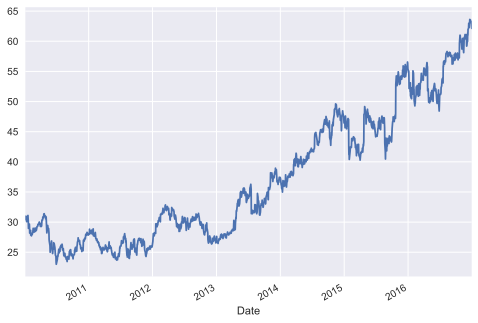

In [10]:
msft.Close.plot.line()

## Distribution

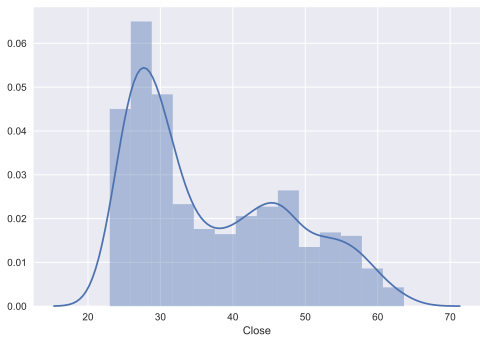

In [11]:
sns.distplot(msft.Close)

## Heatmaps

We want to produce a graph with values by month and year. As the `Date` index only contains a full date, we could produce two new columns using `month` and `year` values.

In [12]:
msft["Month"] = msft.index.map(lambda d: d.month)
msft["Year"] = msft.index.map(lambda d: d.year)
msft[:3]

,Open,High,Low,Close,Volume,Month,Year
Date,,,,,,,
2010-01-04,30.62,31.10,30.59,30.95,38414185,1,2010
2010-01-05,30.85,31.10,30.64,30.96,49758862,1,2010
2010-01-06,30.88,31.08,30.52,30.77,58182332,1,2010


Then we can use the `pivot` function to compute a new `DataFrame`. Note we're resampling data to get values at the month level.

In [13]:
msft_pivot = msft.resample("M").pad().pivot("Month", "Year", "Close")
msft_pivot[:3]

Year,2010,2011,2012,2013,2014,2015,2016
Month,,,,,,,
1,28.18,27.72,29.53,27.45,37.84,40.40,55.09
2,28.67,26.58,31.74,27.80,38.31,43.85,50.88
3,29.29,25.39,32.26,28.60,40.99,40.66,55.23


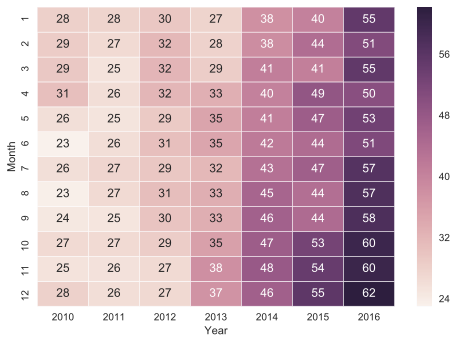

In [14]:
sns.heatmap(msft_pivot, annot=True, linewidths=.5)

## KDE

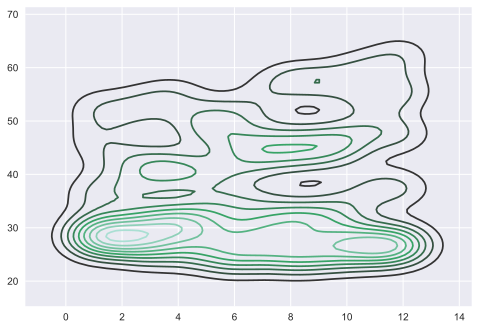

In [15]:
sns.kdeplot(msft[["Month", "Close"]])

## Styling

### Themes

There are five preset seaborn themes: `darkgrid`, `whitegrid`, `dark`, `white`, and `ticks`. By default it uses `darkgrid`.

We can change that for some plots only:

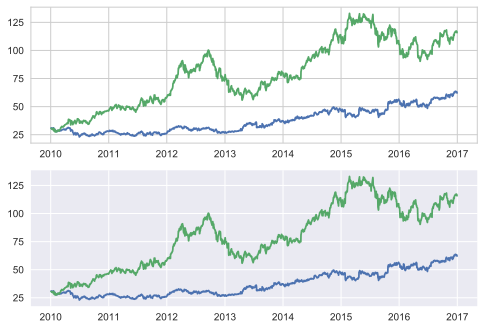

In [16]:
with sns.axes_style("whitegrid"):
    plt.subplot(211)
    plt.plot(msft.Close)
    plt.plot(aapl.Close)
plt.subplot(212)
plt.plot(msft.Close)
plt.plot(aapl.Close)

### Color palletes

Seaborn cames with many [color palletes](https://seaborn.pydata.org/tutorial/color_palettes.html#palette-tutorial), and some utils to work with colors.

To plot a pallete you can use the `palplot` function.

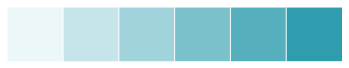

In [17]:
sns.palplot(sns.light_palette((210, 90, 60), input="husl"))

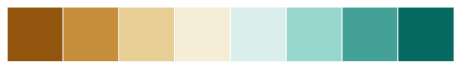

In [18]:
sns.palplot(sns.color_palette("BrBG", 8))

Most of the plotting functions accept a `cmap` parameter where you can set a pallete. When creating a pallete, don't forget to set `as_cmap=True`.

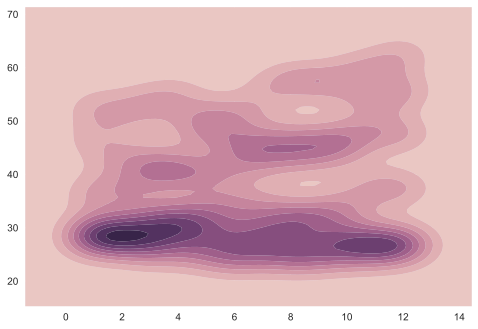

In [19]:
color_map = sns.cubehelix_palette(8, as_cmap=True)
sns.kdeplot(msft[["Month", "Close"]], cmap=color_map, shade=True)